In [26]:
import pandas as pd
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
 'Normal Nucleoli', 'Mitoses','Class']
data = data.drop(['Sample code'],axis=1)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
data.head()

Number of instances = 699
Number of attributes = 10


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [27]:
import numpy as np
data = data.replace('?',np.NaN)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
print('Number of missing values:')
for col in data.columns:
 print('\t%s: %d' % (col,data[col].isna().sum()))

Number of instances = 699
Number of attributes = 10
Number of missing values:
	Clump Thickness: 0
	Uniformity of Cell Size: 0
	Uniformity of Cell Shape: 0
	Marginal Adhesion: 0
	Single Epithelial Cell Size: 0
	Bare Nuclei: 16
	Bland Chromatin: 0
	Normal Nucleoli: 0
	Mitoses: 0
	Class: 0


In [28]:
data1=data
data1 = data1.fillna(data1.median())
print('\nAfter replacing missing values:')
print(data1[20:25])


After replacing missing values:
    Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
20                7                        3                         2   
21               10                        5                         5   
22                3                        1                         1   
23                8                        4                         5   
24                1                        1                         1   

    Marginal Adhesion  Single Epithelial Cell Size Bare Nuclei  \
20                 10                            5          10   
21                  3                            6           7   
22                  1                            2           1   
23                  1                            2           1   
24                  1                            2           1   

    Bland Chromatin  Normal Nucleoli  Mitoses  Class  
20                5                4        4      4  
21             

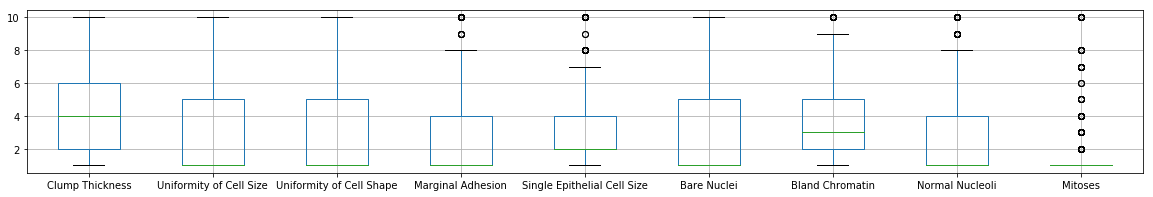

In [29]:
%matplotlib inline
data_box_data1 = data1.drop(['Class'],axis=1)
data_box_data1['Bare Nuclei'] = pd.to_numeric(data_box_data1['Bare Nuclei'])
data_box_data1.boxplot(figsize=(20,3))

In [30]:
data1_x = data1.drop(['Class'],axis=1)
print('Number of instances = %d' % (data1_x.shape[0]))
print('Number of attributes = %d' % (data1_x.shape[1]))
data1_x.head()
data1_y = data1['Class']
print('Number of instances = %d' % (data1_y.shape[0]))
#print('Number of attributes = %d' % (data1_y.shape[1]))
data1_y.head()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data1_x, data1_y, test_size = 0.25,random_state = 0)

Number of instances = 699
Number of attributes = 9
Number of instances = 699


In [31]:
print(X_train.shape)
print(y_train.shape)

(524, 9)
(524,)


[0.9657142857142857, 0.9771428571428571, 0.9714285714285714, 0.9657142857142857, 0.96, 0.9542857142857143, 0.9542857142857143]
0.9640816326530613


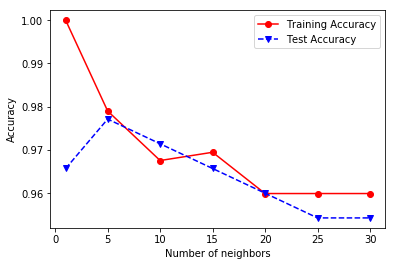

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc_knnd1 = []
testAcc_knndB = []
for k in numNeighbors:
    clf_knnd2 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf_knnd2.fit(X_train, y_train)
    Y_predTrain_knnd2 = clf_knnd2.predict(X_train)
    Y_predTest_knnd2 = clf_knnd2.predict(X_test)
    trainAcc_knnd1.append(accuracy_score(y_train,Y_predTrain_knnd2))
    testAcc_knndB.append(accuracy_score(y_test,Y_predTest_knnd2))
plt.plot(numNeighbors,trainAcc_knnd1,'ro-',numNeighbors,testAcc_knndB,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

print(testAcc_knndB)
print(np.mean(testAcc_knndB))

[0.64, 0.9314285714285714, 0.9371428571428572, 0.9428571428571428, 0.9485714285714286, 0.9485714285714286, 0.96, 0.96, 0.96, 0.96]
0.9188571428571428


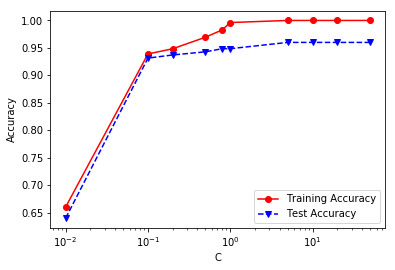

In [33]:

from sklearn.svm import SVC
C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    clf = SVC(C=param,kernel='rbf',gamma='auto')
    clf.fit(X_train,y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    SVMtrainAcc.append(accuracy_score(y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(y_test, Y_predTest))

plt.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')
print(SVMtestAcc)
print(np.mean(SVMtestAcc))

[0.9714285714285714, 0.9657142857142857, 0.96]
0.9657142857142857


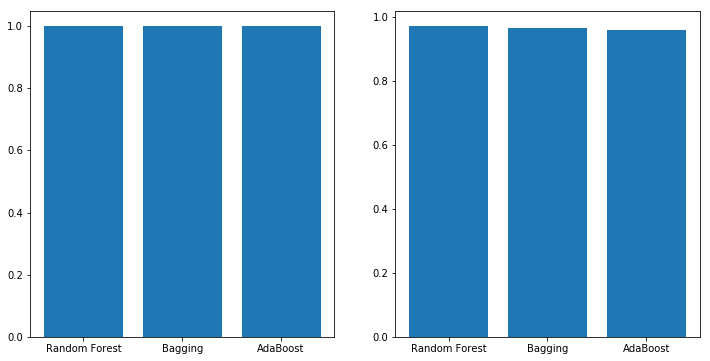

In [34]:
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier

numBaseClassifiers = 500
maxdepth = 10
trainAcc = []
testAcc = []

clf = ensemble.RandomForestClassifier(n_estimators=numBaseClassifiers)
clf.fit(X_train, y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(y_train, Y_predTrain))
testAcc.append(accuracy_score(y_test, Y_predTest))

clf = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(X_train, y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(y_train, Y_predTrain))
testAcc.append(accuracy_score(y_test, Y_predTest))

clf = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(X_train, y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(y_train, Y_predTrain))
testAcc.append(accuracy_score(y_test, Y_predTest))

methods = ['Random Forest', 'Bagging', 'AdaBoost']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.bar([1.5,2.5,3.5], trainAcc)
ax1.set_xticks([1.5,2.5,3.5])
ax1.set_xticklabels(methods)
ax2.bar([1.5,2.5,3.5], testAcc)
ax2.set_xticks([1.5,2.5,3.5])
ax2.set_xticklabels(methods)
print(testAcc)
print(np.mean(testAcc))

In [41]:
data2=data
data2 = data2.fillna(data2.median())
print('\nAfter replacing missing values:')
print(data2[20:25])


After replacing missing values:
    Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
20                7                        3                         2   
21               10                        5                         5   
22                3                        1                         1   
23                8                        4                         5   
24                1                        1                         1   

    Marginal Adhesion  Single Epithelial Cell Size Bare Nuclei  \
20                 10                            5          10   
21                  3                            6           7   
22                  1                            2           1   
23                  1                            2           1   
24                  1                            2           1   

    Bland Chromatin  Normal Nucleoli  Mitoses  Class  
20                5                4        4      4  
21             

In [42]:
AC1 = data2.drop(['Class'],axis=1)
AC1['Bare Nuclei'] = pd.to_numeric(data_box_data1['Bare Nuclei'])
#manging
Z_AC1 = (AC1-AC1.mean())/AC1.std()
Z1 = data2.loc[((Z_AC1 > -3).sum(axis=1)==9) & ((Z_AC1 <= 3).sum(axis=1)==9),:]

data1_x = Z1.drop(['Class'],axis=1)
data1_y = Z1['Class']

In [43]:
Z1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 648 entries, 0 to 698
Data columns (total 10 columns):
Clump Thickness                648 non-null int64
Uniformity of Cell Size        648 non-null int64
Uniformity of Cell Shape       648 non-null int64
Marginal Adhesion              648 non-null int64
Single Epithelial Cell Size    648 non-null int64
Bare Nuclei                    648 non-null object
Bland Chromatin                648 non-null int64
Normal Nucleoli                648 non-null int64
Mitoses                        648 non-null int64
Class                          648 non-null int64
dtypes: int64(9), object(1)
memory usage: 55.7+ KB


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data1_x, data1_y, test_size = 0.25,random_state = 0)

In [45]:
print(X_train.shape)
print(y_train.shape)

(486, 9)
(486,)


[0.9320987654320988, 0.9506172839506173, 0.9506172839506173, 0.9567901234567902, 0.9567901234567902, 0.9506172839506173, 0.9506172839506173]
0.9497354497354497


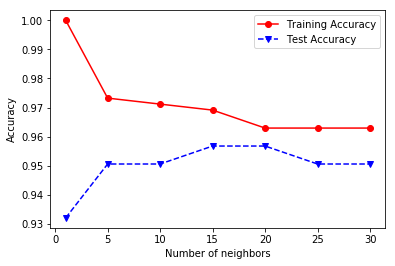

In [47]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc_knnd1 = []
testAcc_knndB = []
for k in numNeighbors:
    clf_knnd2 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf_knnd2.fit(X_train, y_train)
    Y_predTrain_knnd2 = clf_knnd2.predict(X_train)
    Y_predTest_knnd2 = clf_knnd2.predict(X_test)
    trainAcc_knnd1.append(accuracy_score(y_train,Y_predTrain_knnd2))
    testAcc_knndB.append(accuracy_score(y_test,Y_predTest_knnd2))
plt.plot(numNeighbors,trainAcc_knnd1,'ro-',numNeighbors,testAcc_knndB,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

print(testAcc_knndB)
print(np.mean(testAcc_knndB))

[0.7037037037037037, 0.9259259259259259, 0.9320987654320988, 0.9320987654320988, 0.9382716049382716, 0.9382716049382716, 0.9320987654320988, 0.9320987654320988, 0.9320987654320988, 0.9320987654320988]
0.9098765432098764


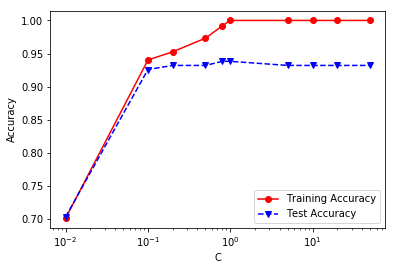

In [48]:
from sklearn.svm import SVC
C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    clf = SVC(C=param,kernel='rbf',gamma='auto')
    clf.fit(X_train,y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    SVMtrainAcc.append(accuracy_score(y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(y_test, Y_predTest))

plt.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')
print(SVMtestAcc)
print(np.mean(SVMtestAcc))

[0.9629629629629629, 0.9567901234567902, 0.9382716049382716]
0.9526748971193415


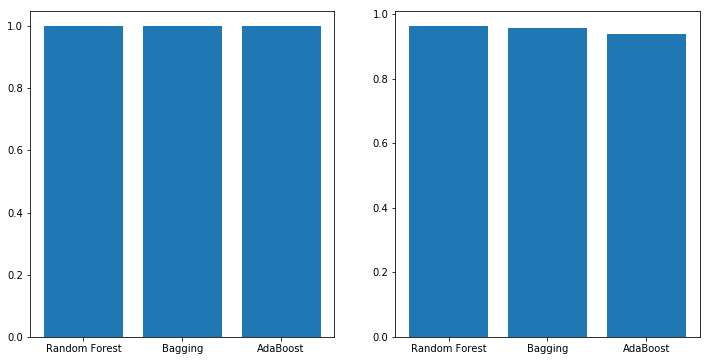

In [49]:
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier

numBaseClassifiers = 500
maxdepth = 10
trainAcc = []
testAcc = []

clf = ensemble.RandomForestClassifier(n_estimators=numBaseClassifiers)
clf.fit(X_train, y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(y_train, Y_predTrain))
testAcc.append(accuracy_score(y_test, Y_predTest))

clf = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(X_train, y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(y_train, Y_predTrain))
testAcc.append(accuracy_score(y_test, Y_predTest))

clf = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(X_train, y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(y_train, Y_predTrain))
testAcc.append(accuracy_score(y_test, Y_predTest))

methods = ['Random Forest', 'Bagging', 'AdaBoost']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.bar([1.5,2.5,3.5], trainAcc)
ax1.set_xticks([1.5,2.5,3.5])
ax1.set_xticklabels(methods)
ax2.bar([1.5,2.5,3.5], testAcc)
ax2.set_xticks([1.5,2.5,3.5])
ax2.set_xticklabels(methods)
print(testAcc)
print(np.mean(testAcc))

In [50]:
data3=data
data3 = data3.fillna(data3.median())
print('\nAfter replacing missing values:')
print(data3[20:25])


After replacing missing values:
    Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
20                7                        3                         2   
21               10                        5                         5   
22                3                        1                         1   
23                8                        4                         5   
24                1                        1                         1   

    Marginal Adhesion  Single Epithelial Cell Size Bare Nuclei  \
20                 10                            5          10   
21                  3                            6           7   
22                  1                            2           1   
23                  1                            2           1   
24                  1                            2           1   

    Bland Chromatin  Normal Nucleoli  Mitoses  Class  
20                5                4        4      4  
21             

In [51]:
import pandas as pd
data3 = data3.drop_duplicates()
data1_x = data3.drop(['Class'],axis=1)
data1_y = data3['Class']

In [52]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463 entries, 0 to 698
Data columns (total 10 columns):
Clump Thickness                463 non-null int64
Uniformity of Cell Size        463 non-null int64
Uniformity of Cell Shape       463 non-null int64
Marginal Adhesion              463 non-null int64
Single Epithelial Cell Size    463 non-null int64
Bare Nuclei                    463 non-null object
Bland Chromatin                463 non-null int64
Normal Nucleoli                463 non-null int64
Mitoses                        463 non-null int64
Class                          463 non-null int64
dtypes: int64(9), object(1)
memory usage: 39.8+ KB


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data1_x, data1_y, test_size = 0.25,random_state = 0)

In [54]:
print(X_train.shape)
print(y_train.shape)

(347, 9)
(347,)


[0.9310344827586207, 0.9482758620689655, 0.9396551724137931, 0.9310344827586207, 0.9310344827586207, 0.9310344827586207, 0.9310344827586207]
0.934729064039409


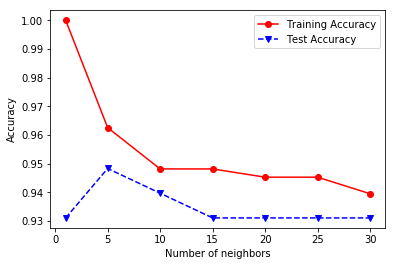

In [55]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc_knnd1 = []
testAcc_knndB = []
for k in numNeighbors:
    clf_knnd2 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf_knnd2.fit(X_train, y_train)
    Y_predTrain_knnd2 = clf_knnd2.predict(X_train)
    Y_predTest_knnd2 = clf_knnd2.predict(X_test)
    trainAcc_knnd1.append(accuracy_score(y_train,Y_predTrain_knnd2))
    testAcc_knndB.append(accuracy_score(y_test,Y_predTest_knnd2))
plt.plot(numNeighbors,trainAcc_knnd1,'ro-',numNeighbors,testAcc_knndB,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

print(testAcc_knndB)
print(np.mean(testAcc_knndB))

[0.4827586206896552, 0.9051724137931034, 0.9051724137931034, 0.9051724137931034, 0.9224137931034483, 0.9310344827586207, 0.9224137931034483, 0.9224137931034483, 0.9224137931034483, 0.9224137931034483]
0.8741379310344828


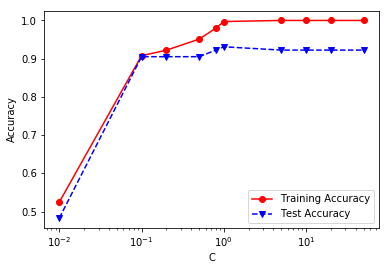

In [56]:
from sklearn.svm import SVC
C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    clf = SVC(C=param,kernel='rbf',gamma='auto')
    clf.fit(X_train,y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    SVMtrainAcc.append(accuracy_score(y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(y_test, Y_predTest))

plt.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')
print(SVMtestAcc)
print(np.mean(SVMtestAcc))

[0.9396551724137931, 0.9224137931034483, 0.9051724137931034]
0.9224137931034484


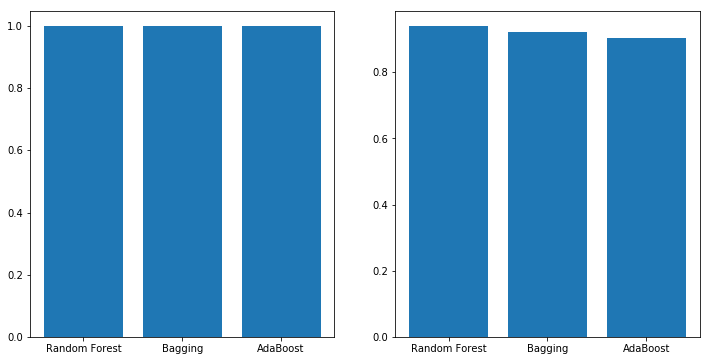

In [57]:
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier

numBaseClassifiers = 500
maxdepth = 10
trainAcc = []
testAcc = []

clf = ensemble.RandomForestClassifier(n_estimators=numBaseClassifiers)
clf.fit(X_train, y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(y_train, Y_predTrain))
testAcc.append(accuracy_score(y_test, Y_predTest))

clf = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(X_train, y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(y_train, Y_predTrain))
testAcc.append(accuracy_score(y_test, Y_predTest))

clf = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(X_train, y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(y_train, Y_predTrain))
testAcc.append(accuracy_score(y_test, Y_predTest))

methods = ['Random Forest', 'Bagging', 'AdaBoost']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.bar([1.5,2.5,3.5], trainAcc)
ax1.set_xticks([1.5,2.5,3.5])
ax1.set_xticklabels(methods)
ax2.bar([1.5,2.5,3.5], testAcc)
ax2.set_xticks([1.5,2.5,3.5])
ax2.set_xticklabels(methods)
print(testAcc)
print(np.mean(testAcc))